# Read me


The [training](https://drive.google.com/file/d/1tfo6qm8zB5Eb7TY8WQGey-SqwBiC-3uO/view?usp=sharing) and [test](https://drive.google.com/file/d/1--yMo6lHVrkU9iqXUjLIJpKLYaz7QfLF/view?usp=sharing) data were downloaded from the [Zoo Galaxy](https://data.galaxyzoo.org/#section-21) platform, corresponding to Galaxy Zoo 2 ([images_gz2.zip](https://zenodo.org/records/3565489#.Y3vFKS-l0eY)).  

These data are stored in "[.pkl](https://drive.google.com/drive/folders/1XalRlt11sYmU11op2z3xPnVsRt8Pz0VM?usp=drive_link)" format instead of the original ".jpg" format to facilitate handling. The dataset consists of 10,000 training images and 5,000 test images. The information is reduced to 75 pixels per image, arranged in a 5x5 pixel grid with three color channels. To visualize the galaxy, it is necessary to reconstruct the image.

# Set up

## Packages

In [ ]:
# Mount Google Drive to access and store files
# Comment out this cell if running the script locally

from google.colab import drive
drive.mount('/content/drive', force_remount=True)  # Force remount to ensure access

Mounted at /content/drive


In [ ]:
# Standard libraries for file handling, data manipulation, and performance tracking
import os                # For managing file and directory operations
import io                # For byte stream handling (e.g., reading and writing in-memory files)
import math              # For mathematical operations like square roots, logarithms, etc.
import joblib            # For saving and loading machine learning models
import requests          # For making HTTP requests, like downloading files from the internet
import numpy as np       # For numerical operations and array manipulation
import pandas as pd      # For data manipulation and analysis using DataFrames
from cycler import cycler        # For setting custom property cycles (e.g., color, linestyle)
import matplotlib.cm as cm       # For accessing colormaps in matplotlib
import matplotlib.pyplot as plt  # For creating and displaying plots and visualizations

In [ ]:
# Visualization
import seaborn as sns  # High-level visualization library built on top of matplotlib

# Deep Learning with TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, load_model  # For building and loading Keras models

# Data Preprocessing
from sklearn.preprocessing import LabelEncoder      # Convert class labels to integers
from sklearn.preprocessing import LabelBinarizer    # Convert class labels to one-hot encoded vectors

# Data Splitting
from sklearn.model_selection import train_test_split  # Split datasets into training and test sets

# Evaluation Metrics
from sklearn.metrics import (
    roc_curve, auc, roc_auc_score,       # For ROC curve and area under the curve
    precision_score, recall_score,       # For evaluating precision and recall
    f1_score                             # For computing F1-score
)


## Funtions

In [ ]:
def load_logdata(data='train'):
    """
    Downloads and loads preprocessed training or testing log data from Google Drive.

    Parameters:
    - data (str): Specifies which log data to load ('train' or 'test').

    Returns:
    - DATA (numpy array or None): The loaded log data if successful, otherwise None.
    """

    # Define Google Drive file IDs for train and test log data
    if data.lower() == 'train':
        file_id = '1wDuS7VDzPIFEb7w_L6q1oe85ONsfEntC'  # File ID for log data train

    elif data.lower() == 'test':
        file_id = '1wAKlz1x5GZ0HbJYL90KcgVJKuDW2ZfIv'  # File ID for log data test

    else:
        print('Error: Type of data invalid')  # Handle incorrect input
        return None

    # Construct the download URL
    url = f"https://drive.google.com/uc?export=download&id={file_id}"

    # Request file from Google Drive
    respuesta = requests.get(url)

    # Load the file as a byte stream
    file_stream = io.BytesIO(respuesta.content)

    # Load the dataset using joblib
    DATA = pd.read_csv(file_stream)

    # Confirm successful data loading
    print(f'{data.lower()} data loaded\nShape: {DATA.shape}')

    return DATA

def load_data(data='train'):
    """
    Downloads and loads preprocessed training or testing data from Google Drive.

    Parameters:
    - data (str): Specifies which dataset to load ('train' or 'test').

    Returns:
    - DATA (numpy array or None): The loaded dataset if successful, otherwise None.
    """

    # Define Google Drive file IDs for train and test datasets
    if data.lower() == 'train':
        file_id = '1-8JHObeY7kaU0qLt0p7WDFRJf6A6iYFN'  # File ID for training data

    elif data.lower() == 'test':
        file_id = '1bdjlyKp02O04uGkixX1E4mQMkUjvWRbL'  # File ID for test data

    else:
        print('Error: Type of data invalid')  # Handle incorrect input
        return None

    # Construct the download URL
    url = f"https://drive.google.com/uc?export=download&id={file_id}"

    # Request file from Google Drive
    respuesta = requests.get(url)

    # Load the file as a byte stream
    file_stream = io.BytesIO(respuesta.content)

    # Load the dataset using joblib
    DATA = joblib.load(file_stream)

    # Confirm successful data loading
    print(f'{data.lower()} data loaded\nShape: {DATA.shape}')

    return DATA

def Load_Models(model='ipca'):
    """
    Downloads and loads a machine learning model from Google Drive.

    Parameters:
    - model (str): Specifies which model to load ('ipca' or 'scaler').

    Returns:
    - DATA (object or None): The loaded model object if successful, otherwise None.
    """

    # Define Google Drive file IDs for different models
    if model.lower() == 'ipca':
        file_id = '1s_reCv_xE5jQ_pKUtoPDsH6qPRJId_OL'  # File ID for the Incremental PCA model

    elif model.lower() == 'scaler':
        file_id = '1kl2dynGnyYr70_ChOOzQT3z1t3n7RB9w'  # File ID for the StandardScaler model

    else:
        print('Error: Invalid model type specified')  # Handle incorrect input
        return None

    # Construct the Google Drive download URL
    url = f"https://drive.google.com/uc?export=download&id={file_id}"

    # Send a request to download the model file
    respuesta = requests.get(url)

    # Convert the downloaded content into a byte stream
    file_stream = io.BytesIO(respuesta.content)

    # Load the model using joblib
    MODEL = joblib.load(file_stream)

    # Confirm successful model loading
    print(f'Model loaded: {MODEL}')

    return MODEL

def single_reconverter(data):
    """
    Takes a single PCA-transformed data point, reverses the PCA and scaling transformations,
    and normalizes it before reshaping it into an image.

    Parameters:
    - data (numpy array): A single data point in PCA-reduced form.

    Returns:
    - norm_centroides (numpy array): Reconstructed image (174x174x3).
    """
    data = data.reshape(1, -1)  # Ensure data is a 2D array
    centroides = scaler.inverse_transform(data)  # Reverse standard scaling
    centroides = ipca.inverse_transform(centroides)  # Reverse PCA transformation
    norm_centroides = normalized(centroides)  # Normalize pixel values
    norm_centroides = norm_centroides.reshape(174, 174, 3)  # Reshape into an image
    return norm_centroides


def reconverter(data):
    """
    Reconstructs multiple PCA-reduced data points back into images.

    Parameters:
    - data (numpy array): Multiple PCA-transformed data points.

    Returns:
    - norm_centroides (numpy array): Reconstructed images with normalized pixel values.
    """
    centroides = scaler.inverse_transform(data)  # Reverse scaling
    centroides = ipca.inverse_transform(centroides)  # Reverse PCA
    norm_centroides = normalized(centroides)  # Normalize pixel values
    return norm_centroides


def normalized(data):
    """
    Normalizes data to the range [0,1] using min-max scaling.

    Parameters:
    - data (numpy array): Input data.

    Returns:
    - norm (numpy array): Normalized data.
    """
    norm = (data - data.min()) / (data.max() - data.min())  # Min-max normalization
    return norm

def select_color(colores):
    """
    Set a custom color cycle for matplotlib plots using a colormap.

    Parameters:
    - colores (str): Name of the matplotlib colormap to use (e.g., 'tab10', 'Set2', 'plasma').

    Returns:
    - None: This function modifies the global matplotlib color cycle.
    """

    # Load the colormap with 12 discrete colors
    cmap = cm.get_cmap(colores, 12)

    # Extract individual colors from the colormap
    colores_paired = [cmap(i) for i in range(cmap.N)]

    # Set the color cycle globally for matplotlib axes
    plt.rc('axes', prop_cycle=cycler('color', colores_paired))

    return None

## Directories

In [ ]:
### Drive roots ####

root_train ='/content/drive/MyDrive/Practicas_Profesionales/Data/PKLs/train_data.pkl'
root_test ='/content/drive/MyDrive/Practicas_Profesionales/Data/PKLs/test_data.pkl'

root_ipca = '/content/drive/MyDrive/Practicas_Profesionales/Codes/Models/Pre-processing/reduce_dimensions.pkl'
root_scaler = '/content/drive/MyDrive/Practicas_Profesionales/Codes/Models/Pre-processing/scaler.pkl'

root_log_data = '/content/drive/MyDrive/Practicas_Profesionales/Data/Log_data/'

root_CNN = '/content/drive/MyDrive/Practicas_Profesionales/Codes/Models/CNN/'
root_result = '/content/drive/MyDrive/Practicas_Profesionales/Results/CNN/'

In [ ]:
# ### Local roots ####

# root_train ='/home/tonathiu/Fisica/Practicas_Profesionales/Data/train_data.pkl'
# root_test ='/home/tonathiu/Fisica/Practicas_Profesionales/Data/test_data.pkl'

# root_ipca = '/home/tonathiu/Fisica/Practicas_Profesionales/Codes/Models/Pre-processing/reduce_dimensions.pkl'
# root_scaler = '/home/tonathiu/Fisica/Practicas_Profesionales/Codes/Models/Pre-processing/scaler.pkl'

# root_CNN = '/home/tonathiu/Fisica/Practicas_Profesionales/Codes/Models/'
# root_result = '/home/tonathiu/Fisica/Practicas_Profesionales/Results/CNN/'

## Load Models

In [ ]:
# Get the second model file listed in the directory
model_to_use = os.listdir(root_CNN)[1]

# Construct the full path to the selected model file
root_model = os.path.join(root_CNN, model_to_use)

# Print the path to verify which model will be loaded
print(root_model)

/content/drive/MyDrive/Practicas_Profesionales/Codes/Models/CNN/Model_no_kfold_balanced.keras


In [ ]:
# Load models from drive

ipca = Load_Models('ipca')
scaler = Load_Models('scaler')
modeloCNN = load_model(root_model)
modeloCNN.summary()

Model loaded: IncrementalPCA(batch_size=100, n_components=75)
Model loaded: StandardScaler()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 174, 174, 64)        │           6,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 58, 58, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 56, 56, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 18, 18, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         524,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 12)                  │             780 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,762,502 (6.72 MB)

 Trainable params: 587,500 (2.24 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,175,002 (4.48 MB)

In [ ]:
# ## Run if you have file of ipca & scaler on your computer/Drive

# ipca = joblib.load(root_ipca)
# scaler = joblib.load(root_scaler)

## Load Log Data

In [ ]:
# Load the testing log data from Google Drive
log_data_test = load_logdata('test')

test data loaded
Shape: (10000, 3)


# Test Dataset

In [ ]:
# Load datasets from drive
test_data = load_data('test')

test data loaded
Shape: (10000, 75)


In [ ]:
# Initialize the LabelEncoder to convert categorical labels into numerical values
encoder = LabelEncoder()

# Fit the encoder on the 'gz2_class' column and transform the labels into numerical format
labels = encoder.fit_transform(log_data_test['gz2_class'])

# Add the encoded labels as a new column 'labels' in the log_data_train DataFrame
log_data_test['labels'] = labels

In [ ]:
# Define total number of samples in the test dataset
total_data = len(test_data)

# Define how many samples to use for evaluation
data_to_use = 5_000

# Calculate what fraction of the dataset that represents
alpha = data_to_use / total_data

# Display the selected proportion and exact number of images to use
print(f'Percent of data to use: {alpha}\nSize data to use: {int(total_data * alpha)} images')

Percent of data to use: 0.5
Size data to use: 5000 images


In [ ]:
# Split the sampled dataset into training and validation sets using stratified sampling
_,X_data,_,Y_data = train_test_split(test_data, labels, test_size=alpha,stratify=labels, random_state = 31)

# Determine the number of unique classes in the sampled labels
classes = len(np.unique(Y_data))

In [ ]:
# Convert the first PCA-transformed image back to its original RGB format
sample_data = single_reconverter(np.array(train_data.iloc[0]))

# Determine the number of color channels (3 for RGB)
colors_chanels = sample_data.shape[-1]

# Get the height (and width) of the image
size_img = sample_data.shape[0]

In [ ]:
sample_data.shape

(174, 174, 3)

In [ ]:
# Reconstruct the PCA-transformed test data back to image format
x_test = reconverter(X_data)

# Reshape the reconstructed images to 4D tensors (batch_size, height, width, channels)
x_test = x_test.reshape(-1, size_img, size_img, colors_canals)

# Assign the test labels
y_test = Y_data

# Predictions

In [ ]:
# Predict class probabilities for each test image using the trained CNN model
y_pred_prob = modeloCNN.predict(x_test)

# Select the class with the highest probability for each prediction
y_pred = np.argmax(y_pred_prob, axis=1)

157/157 ━━━━━━━━━━━━━━━━━━━━ 74s 468ms/step


# Accuracy

In [ ]:
# Evaluate the CNN model on the test set
test_loss, test_acc = modeloCNN.evaluate(x_test, y_test)

# Calculate additional classification metrics using sklearn
precision = precision_score(y_test, y_pred, average='weighted')  # Weighted precision across all classes
recall = recall_score(y_test, y_pred, average='weighted')        # Weighted recall
F1 = f1_score(y_test, y_pred, average='weighted')                # Weighted F1 score

157/157 ━━━━━━━━━━━━━━━━━━━━ 72s 454ms/step - accuracy: 0.4178 - loss: 1.5705


In [ ]:
# Free up memory by deleting the training and validation data from RAM
x_test = None

In [ ]:
print(f'Evaluación del modelo: {model_to_use}')
print(f'Test loss: {np.round(test_loss, 4)}')
print(f'Test accuracy: {np.round(test_acc, 4)}')
print(f'Precisión: {np.round(precision, 4)}')
print(f'Recall: {np.round(recall, 4)}')
print(f'F1: {np.round(F1, 4)}')

Evaluación del modelo: Model_no_kfold_balanced.keras
Test loss: 1.5919
Test accuracy: 0.4068
Presición: 0.4257
Recall: 0.4068
F1: 0.4063


# Curva ROC

In [ ]:
# Convert integer class labels into one-hot encoded format
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)  # Shape: (num_samples, num_classes)

# Initialize dictionaries to store ROC metrics
fpr = dict()       # False Positive Rate
tpr = dict()       # True Positive Rate
roc_auc = dict()   # Area Under the Curve (AUC)

# Compute ROC curve and AUC for each class
for i in range(classes):
    fpr[i], tpr[i], thresholds = np.float32(roc_curve(y_test_bin[:, i], y_pred_prob[:, i]))
    roc_auc[i] = np.float32(auc(fpr[i], tpr[i]))


In [ ]:
# Print the unique numeric class labels in the test set
print(np.unique(y_test))

# Decode all test labels back to their original class names
all_clases = encoder.inverse_transform(y_test)

# Decode only the unique class indices to get class names in order
clases = encoder.inverse_transform(np.unique(y_test))

# Display the list of class names present in y_test
print(clases)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
['A' 'Ec' 'Ei' 'Er' 'SB' 'Sa' 'Sb' 'Sc' 'Sd' 'Seb' 'Sen' 'Ser']


In [ ]:
for i in range(classes):
    print(f'Clase {clases[i]}: AUC = {roc_auc[i]:.6f}')

Clase A: AUC = 0.992609
Clase Ec: AUC = 0.899348
Clase Ei: AUC = 0.758872
Clase Er: AUC = 0.847186
Clase SB: AUC = 0.714298
Clase Sa: AUC = 0.779648
Clase Sb: AUC = 0.698289
Clase Sc: AUC = 0.758929
Clase Sd: AUC = 0.945062
Clase Seb: AUC = 0.998600
Clase Sen: AUC = 0.986622
Clase Ser: AUC = 0.946571


<ipython-input-29-d8a2e16f30f4>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(colores, 12)


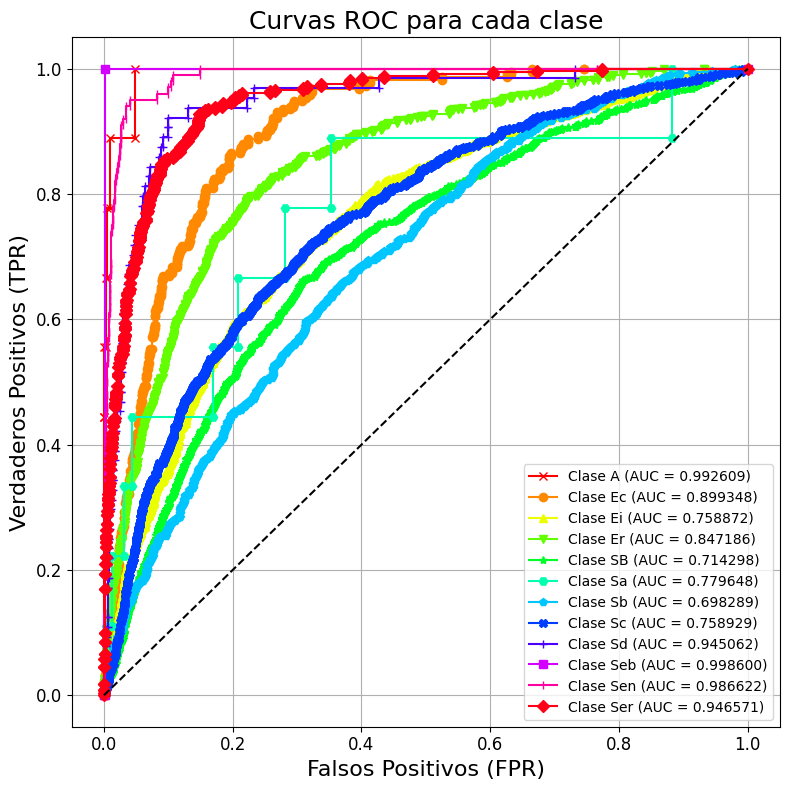

In [ ]:
select_color('hsv')  # Set the color cycle to HSV colormap

markers = ['x', 'o', '^', 'v', '*', 'H', 'p', 'X', '+', 's', '|', 'D']  # Unique marker per class

plt.figure(figsize=(8, 8))

# Plot ROC curve for each class
for i in range(classes):
    plt.plot(fpr[i], tpr[i],
             marker=markers[i],
             label=f'Clase {clases[i]} (AUC = {roc_auc[i]:.6f})')

# Diagonal reference line
plt.plot([0, 1], [0, 1], c='k', linestyle='--')

# Axis labels and title
plt.xlabel('Falsos Positivos (FPR)', fontsize=16)
plt.ylabel('Verdaderos Positivos (TPR)', fontsize=16)
plt.title('Curvas ROC para cada clase', fontsize=18)

# Style and legend
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(root_result, f'ROC_{model_to_use}.pdf'))
plt.show()


# Matrix confusions

Note: The sum of all the values ​​of the confusion matrix must be 100%, so in the case of an ideal classifier, the confusion matrix would show a value of 8.33% in the trace for each element of the trace.

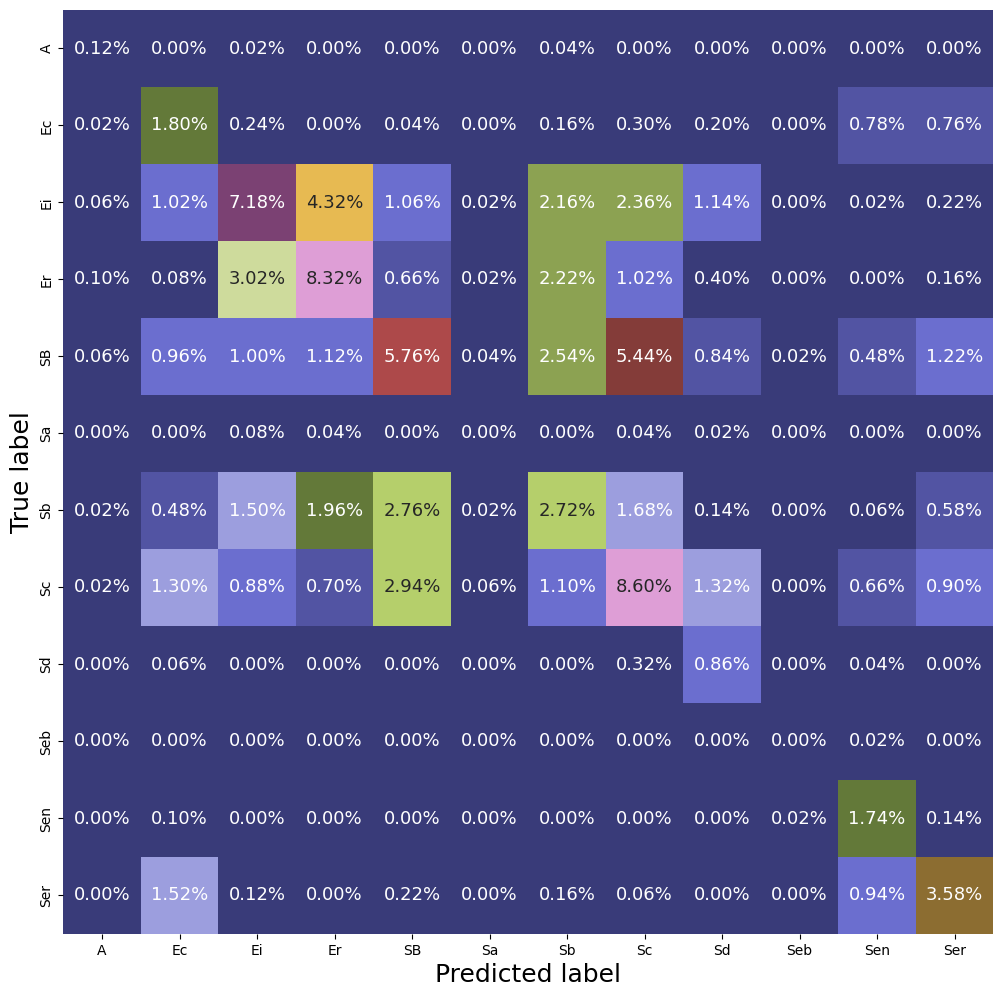

In [ ]:
# Generate the confusion matrix as a TensorFlow tensor
cnf_mtx = tf.math.confusion_matrix(y_test, y_pred)

# Create a figure for plotting
plt.figure(figsize=(12, 12))

# Define class tick marks (for axis labels)
tick_marks = np.arange(len(clases))

# Plot the heatmap
sns.heatmap(
    cnf_mtx / np.sum(cnf_mtx),    # Normalize the confusion matrix (relative frequency)
    annot=True,                   # Show values inside the boxes
    fmt='.2%',                    # Format as percentage
    xticklabels=clases,           # Class names on x-axis
    yticklabels=clases,           # Class names on y-axis
    cmap='tab20b',                # Use a visually distinct colormap
    cbar=False,                   # Remove colorbar for cleaner look
    annot_kws={"size": 13}        # Font size for annotations
)

# Axis labels
plt.ylabel('True label', size=18)
plt.xlabel('Predicted label', size=18)
plt.savefig(os.path.join(root_result, f'Matrix_confusion_{model_to_use}.pdf'))
# Display the plot
plt.show()